## Using Scipy

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

Define some test data which is close to Gaussian

In [ ]:
data = numpy.random.normal(size=10000)

In [ ]:
plt.plot(data)
plt.show()
sns.distplot(data, bins=40);

Get the bin centers and their height

In [ ]:
hist, bin_edges = numpy.histogram(data, bins=30, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

In [ ]:
plt.plot(bin_centres, hist)
plt.show()

## Fitting a single Gaussian

Define model function to be used to fit to the data above:

In [ ]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

p0 is the initial guess for the fitting coefficients (A, mu and sigma above)

In [ ]:
p0 = [1., 0., 1.]

In [ ]:
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

Get the fitted curve and dislpay it

In [ ]:
hist_fit = gauss(bin_centres, *coeff)

plt.figure(figsize=(15,10))
sns.distplot(data)
plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')
plt.legend()
plt.show()

lets get the fitting parameters, i.e. the mean and standard deviation:

In [ ]:
print('A = ', coeff[0])
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

## Mixture of Gaussians (in this case two)

In [ ]:
data1 = numpy.random.normal(size=10000) + 0
data2 = numpy.random.normal(size=1000) * .5 + 3

data = np.concatenate((data1, data2))

In [ ]:
sns.distplot(data)
plt.show()

Get the **x (bin_centers)** and **y values(hist)**

In [ ]:
hist, bin_edges = numpy.histogram(data, bins=30, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

In [ ]:
plt.plot(bin_centres, hist)
plt.show()

In [ ]:
def gauss(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2= p

    return A1*numpy.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))

In [ ]:
p0 = [1., 0., 1., 1., 0., 1.]

In [ ]:
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

In [ ]:
hist_fit = gauss(bin_centres, *coeff)

plt.figure(figsize=(15,10))
sns.distplot(data)
plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')
plt.legend()
plt.show()

It seems that the nitialization is really important for the scipy fit to work for mixture distributions. Let's see if normalizatoon works here.<br/>
I basically need to normalize the x values.

In [ ]:
data = (data - np.mean(data)) / np.std(data)

In [ ]:
hist, bin_edges = numpy.histogram(data, bins=30, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

In [ ]:
plt.plot(bin_centres, hist)
plt.show()

In [ ]:
p0 = [1., 0., 1., 1., 0., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

In [ ]:
hist_fit = gauss(bin_centres, *coeff)

plt.figure(figsize=(15,10))
sns.distplot(data)
plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')
plt.legend()
plt.show()

# Using  sklearn

In [110]:
import numpy as np
import pandas as pd
import sklearn.mixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [193]:
data1 = np.random.normal(size=1000000)
data2 = np.random.normal(size=100000) * .5 + 2.5

data = np.concatenate((data1, data2))

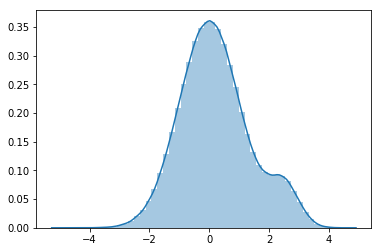

In [194]:
sns.distplot(data)
plt.show()

In [242]:
# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

data = data.reshape(-1, 1)

for i in range(len(N)):
    models[i] = sklearn.mixture.GaussianMixture(N[i]).fit(data)

# compute the AIC and the BIC
AIC = [m.aic(data) for m in models]
BIC = [m.bic(data) for m in models]

In [277]:
fitted = models[np.argmin(BIC)]

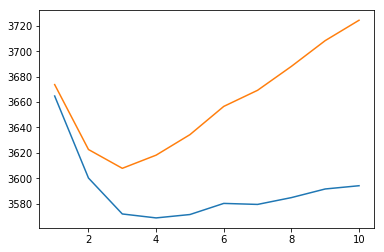

In [278]:
plt.plot(N, AIC)
plt.plot(N, BIC)

In [279]:
print('weights: ', fitted.weights_)
print('means: ', fitted.means_[:,0])
# print('variance: ', fitted.covariances_[:,0,0])
print('variance: ', fitted.covariances_[:, 0, 0])

weights:  [0.4574242 0.1502913 0.3922845]
means:  [17.62266662 27.66961045 21.80057512]
variance:  [2.9389912  3.03221855 2.82178125]


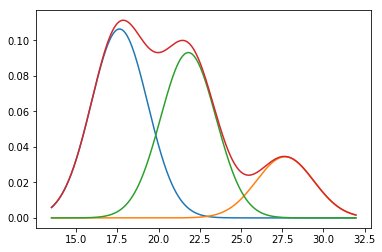

In [280]:
data_range = np.arange(data.min(),data.max(),0.01)
mixture = np.arange(data.min(),data.max(),0.01) * 0

for ind in range(fitted.n_components):

    weight = fitted.weights_[ind]
    mean = fitted.means_[ind, 0]
    var = np.sqrt(fitted.covariances_[ind, 0, 0])  # scipy pdf function accepts std and not variance
    
    plt.plot(np.arange(data.min(),data.max(),0.01), weight * norm.pdf(data_range, mean, var))
    
    mixture += weight * norm.pdf(data_range, mean, var)
    
plt.plot(np.arange(data.min(),data.max(),0.01), mixture)
plt.show()

## Trying it on actual latency data

In [690]:
filename = 's37_060318'
df = pd.read_csv('..//Measurements//' + filename + '.csv')

In [691]:
import sys
sys.path.append('../Pipeline/')

import plot_latency_hist as plh

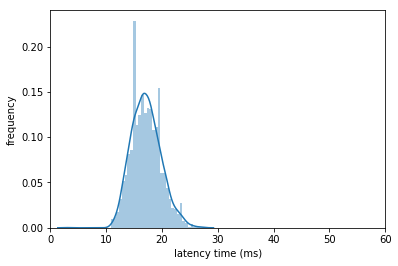

In [692]:
data = plh.plot_latency_hist(df, return_data=True).values.reshape(-1,1)

In [693]:
# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

data = data.reshape(-1, 1)

for i in range(len(N)):
    models[i] = sklearn.mixture.GaussianMixture(N[i]).fit(data)

# compute the AIC and the BIC
AIC = [m.aic(data) for m in models]
BIC = [m.bic(data) for m in models]

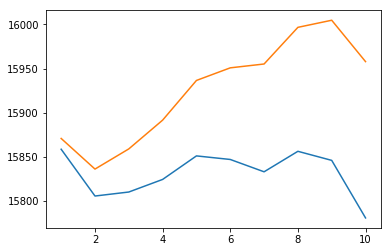

In [694]:
plt.plot(N, AIC)
plt.plot(N, BIC)
plt.show()

In [695]:
fitted = models[np.argmin(BIC)]

In [696]:
print('weights: ', fitted.weights_)
print('means: ', fitted.means_[:,0])
print('variance: ', fitted.covariances_[:, 0, 0])

weights:  [0.39092215 0.60907785]
means:  [19.18641351 15.81674678]
variance:  [5.28174779 3.66817647]


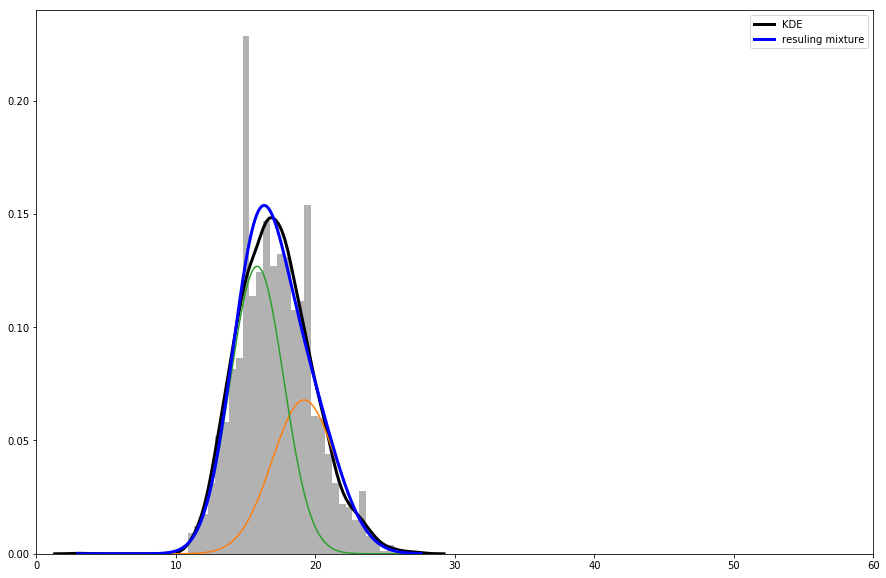

In [697]:
data_range = np.arange(data.min(),data.max(),0.01)
mixture = np.arange(data.min(),data.max(),0.01) * 0

plt.figure(figsize=(15,10))
sns.distplot(data, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"alpha": .3, "color": "k"})


for ind in range(fitted.n_components):

    weight = fitted.weights_[ind]
    mean = fitted.means_[ind, 0]
    var = np.sqrt(fitted.covariances_[ind, 0, 0])  # scipy pdf function accepts std and not variance
    
    plt.plot(np.arange(data.min(),data.max(),0.01), weight * norm.pdf(data_range, mean, var))
    
    mixture += weight * norm.pdf(data_range, mean, var)

    
plt.plot(np.arange(data.min(),data.max(),0.01), mixture, 
         linewidth=3.0, label='resuling mixture', color='b')
plt.legend()
plt.xlim([0, 60])
plt.savefig('..//Figures//' + filename + '_fitted' + '.png')
plt.show()